## Описание

"Рекламодатель Сигма жалуется на постоянный рост CPA по своим рекламным кампаниям в последние 4 месяца (с июня по сентябрь 2022). Ваша задача проанализировать его размещение с целью:

 - 1) Выяснить причину растущего CPA
 - 2) Дать рекомендации по снижению и стабилизации CPA до целевого значения (380 руб)"
 
Описание столбцов:
- Client – название клиента
-  Device – тип устройства 
- Type – тип канала
- Place – тип площадки (только для Type: Direct)
- BannerType – тип объявления
- QueryType – тип запроса (только для Type: Direct , только поиск)
- TargetingType – тип таргетинга (только для Type: Direct)
- Cost - расходы рекламодателя
- Conversions – целевые визиты (только Директ)

Ожидаемый результат
- Презентация в ppt с выводами и графиками
- Исходники с расчетами в свободном, но структурированном и читаемом формате (на ваше усмотрение - ссылки на xlsx-файл, data studio, bi и тд)

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Load the xlsx file
# ЧТобы заработало чтение файла нужно установить 
# pip install openpyxl
# pip install

df = pd.read_excel(
    'C:/Users/oilca/Documents/projects/Задание_стажировка_рекламный аналитик_2023.xlsx',
    sheet_name='data'
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478 entries, 0 to 10477
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Client                   10478 non-null  object        
 1   Month                    10478 non-null  datetime64[ns]
 2   Category                 10478 non-null  object        
 3   Device                   10478 non-null  object        
 4   Place                    10478 non-null  object        
 5   BannerType               10478 non-null  object        
 6   QueryType (search only)  10478 non-null  object        
 7   TargetingType            10478 non-null  object        
 8   Shows                    10478 non-null  int64         
 9   Clicks                   10478 non-null  int64         
 10  Cost                     10478 non-null  float64       
 11  Conversions              10478 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

In [3]:
# Функция для знакомства с датасетом
def review(dataset):
    display(dataset.head())
    print()
    dataset.info()
    print()
    display(dataset.describe())
    print()
    for col in dataset.columns:
        print(dataset[col].unique())
    print()
    print('Количество найденных дубликатов:',dataset.duplicated().sum())
    try:
        dataset.hist()
    except ValueError:
        print('Нет данных для построения гистограмм')

,Client,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost,Conversions
0,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.000000,0
1,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,5949,41,1666.844364,0
2,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,cpc_video,none,Retargeting,191,6,40.641915,0
3,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,227,1,45.747407,0
4,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,18,0,0.000000,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478 entries, 0 to 10477
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Client                   10478 non-null  object        
 1   Month                    10478 non-null  datetime64[ns]
 2   Category                 10478 non-null  object        
 3   Device                   10478 non-null  object        
 4   Place                    10478 non-null  object        
 5   BannerType               10478 non-null  object        
 6   QueryType (search only)  10478 non-null  object        
 7   TargetingType            10478 non-null  object        
 8   Shows                    10478 non-null  int64         
 9   Clicks                   10478 non-null  int64         
 10  Cost                     10478 non-null  float64       
 11  Conversions              10478 non-null  int64         
dtypes: datetime64[ns](1), float64(1

,Shows,Clicks,Cost,Conversions
count,1.047800e+04,1.047800e+04,1.047800e+04,10478.000000
mean,1.715049e+06,9.769437e+03,3.598293e+05,507.982344
std,1.544924e+07,4.454819e+04,1.211802e+06,2086.404812
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.181150e+04,2.805000e+02,1.304677e+04,2.000000
75%,1.326425e+05,5.130250e+03,2.111534e+05,94.000000
max,5.831506e+08,2.237376e+06,3.976618e+07,47259.000000



['Псилон' 'Гамма' 'Дельта' 'Сигма' 'Омега' 'Зета' 'Бета' 'Альфа' 'Мета'
 'Лямбда']
['2021-04-01T00:00:00.000000000' '2021-05-01T00:00:00.000000000'
 '2021-06-01T00:00:00.000000000' '2021-07-01T00:00:00.000000000'
 '2021-08-01T00:00:00.000000000' '2021-09-01T00:00:00.000000000'
 '2021-10-01T00:00:00.000000000' '2021-11-01T00:00:00.000000000'
 '2021-12-01T00:00:00.000000000' '2022-01-01T00:00:00.000000000'
 '2022-02-01T00:00:00.000000000' '2022-03-01T00:00:00.000000000'
 '2022-04-01T00:00:00.000000000' '2022-05-01T00:00:00.000000000'
 '2022-06-01T00:00:00.000000000' '2022-07-01T00:00:00.000000000'
 '2022-08-01T00:00:00.000000000' '2022-09-01T00:00:00.000000000']
['РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ' 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'
 'КРЕДИТНЫЕ КАРТЫ' 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ' 'ИНВЕСТИЦИИ' 'ДЕБЕТОВЫЕ КАРТЫ'
 'ВКЛАДЫ']
['Desktop' 'Mobile']
['Networks' 'Search']
['cpc_video' 'image_ad' 'mcbanner' 'text' 'cpm_banner' 'performance'
 'dynamic']
['none' 'Brand' 'Other' 'Competitor']
['Phrase' 'Retarg

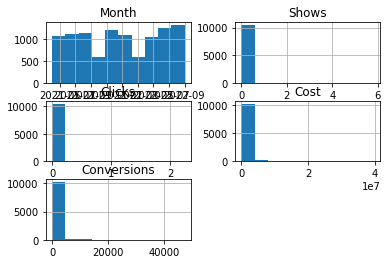

In [4]:
review(df)

Выводы: 
- данные полные - пропусков нет
- дубликаты отсутствуют
- можно изменить названия колонок
- период данных с апреля 2021 по сентябрь 2022

## Обработка и подготовка данных

### Преобразуем названия столбцов

In [5]:
df.columns

Index(['Client', 'Month', 'Category', 'Device', 'Place', 'BannerType',
       'QueryType (search only)', 'TargetingType', 'Shows', 'Clicks', 'Cost',
       'Conversions'],
      dtype='object')

Немного укоротим назвние одного из столбцов

In [6]:
df = df.rename(columns = {
    'QueryType (search only)':'querytype',})

Остальные приведем к нижнему регистру

In [7]:
df.columns = df.columns.str.lower()

### Добавление столбца CPC и CPA

Добавление cpc (Cost Per Click)

In [8]:
df['cpc'] = df['cost']/df['clicks']

Добавление cpa( Cost Per Action)

In [9]:
df['cpa'] = df['cost']/df['conversions']

### Создание отдельных таблиц

Т.к. по парамерту CPA в некоторых строках получились значения inf(бесконечность),создадим отфильтрованную таблицу - исключим такие строки

In [10]:
df_filtered = df.query('cpa != inf')

Создадим две таблицы sigma и sigma_filtered для клиента сигма с полными данными и без строк, где в параметра CPA есть бесконечность.

In [11]:
sigma = df.query('client == "Сигма"')
sigma_filtered = df_filtered.query('client == "Сигма"')
sigma

,client,month,category,device,place,bannertype,querytype,targetingtype,shows,clicks,cost,conversions,cpc,cpa
8,Сигма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Phrase,531,4,99.492000,0,24.873000,inf
9,Сигма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,215,2,52.658212,0,26.329106,inf
55,Сигма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,text,none,Phrase,5053827,2531,74531.395042,0,29.447410,inf
56,Сигма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,text,none,Retargeting,45630,50,1536.406424,0,30.728128,inf
57,Сигма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,text,Brand,Phrase,6933,1036,27636.633508,0,26.676287,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10442,Сигма,2022-09-01,ВКЛАДЫ,Mobile,Networks,text,none,Phrase,399500,7921,59133.506136,232,7.465409,254.885802
10443,Сигма,2022-09-01,ВКЛАДЫ,Mobile,Networks,text,none,Retargeting,47139,1132,4998.836542,31,4.415933,161.252792
10444,Сигма,2022-09-01,ВКЛАДЫ,Mobile,Search,text,Brand,Phrase,10590,2991,17404.488559,74,5.818953,235.195791
10445,Сигма,2022-09-01,ВКЛАДЫ,Mobile,Search,text,Competitor,Phrase,0,0,0.000000,0,NaN,NaN


In [12]:
sigma_filtered

,client,month,category,device,place,bannertype,querytype,targetingtype,shows,clicks,cost,conversions,cpc,cpa
105,Сигма,2021-05-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,460,0,0.000000,0,NaN,NaN
106,Сигма,2021-05-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Phrase,1,0,0.000000,0,NaN,NaN
126,Сигма,2021-05-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Other,Phrase,114,0,0.000000,0,NaN,NaN
127,Сигма,2021-05-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,mcbanner,Brand,Phrase,6,0,0.000000,0,NaN,NaN
128,Сигма,2021-05-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,mcbanner,Competitor,Phrase,30,0,0.000000,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10441,Сигма,2022-09-01,ВКЛАДЫ,Desktop,Search,text,Competitor,Phrase,0,0,0.000000,0,NaN,NaN
10442,Сигма,2022-09-01,ВКЛАДЫ,Mobile,Networks,text,none,Phrase,399500,7921,59133.506136,232,7.465409,254.885802
10443,Сигма,2022-09-01,ВКЛАДЫ,Mobile,Networks,text,none,Retargeting,47139,1132,4998.836542,31,4.415933,161.252792
10444,Сигма,2022-09-01,ВКЛАДЫ,Mobile,Search,text,Brand,Phrase,10590,2991,17404.488559,74,5.818953,235.195791


In [13]:
sigma_filtered['cpa'].mean()

4344.857718261822

In [14]:
sigma['cpc'].mean()

63.84944937182657

In [15]:
col = ['category','device','place','bannertype','querytype','targetingtype']

### Создание функции для построения группы графиков

In [16]:
def chart(data,
          y,
          func,
          col = ['category','device','place','bannertype','querytype','targetingtype'],
          text = ''):
    # Строим сводную таблицу группируем по датам, разделяем данные по источникам (колонки)
    # считаем сумму трат    
    for i in col:
        (
            data
            .pivot_table(
                index = 'month',
                columns = i,
                values = y,
                aggfunc = func
            )
            # Строим график с помощью plot
            .plot(grid=True, figsize=(12, 5))
        )    
        plt.xlabel('Дата', size = 16)
        plt.ylabel('Затраты на рекламу', size = 16)
        plt.title(f'{i} - {text}', size = 18, pad = 25,fontdict = {'fontweight' : 'bold'})
        plt.show()
    return

Графиков будет много и мягко говоря загромоздит все, но думаю это откроет более подробную картину.

## Анализ данных

### Все клиенты

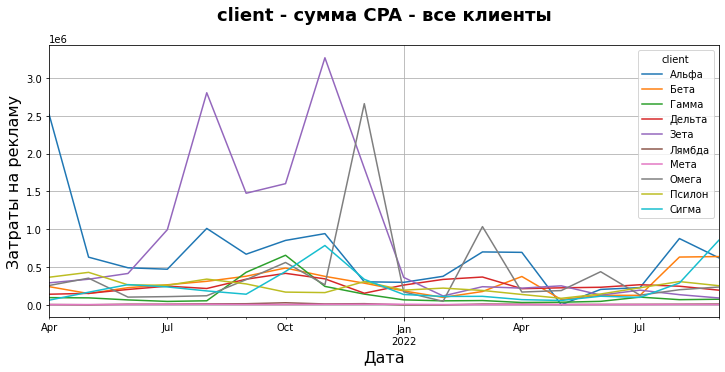

In [17]:
chart(df_filtered, 'cpa', 'sum', col = ['client'], text = 'сумма CPA - все клиенты')

Не только у сигмы наблюдается рост за последние 4 месяца

### Анализ в Сигме

#### По стомости кликов

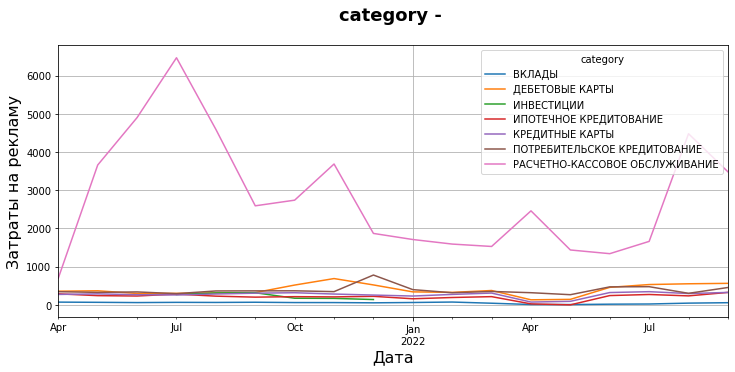

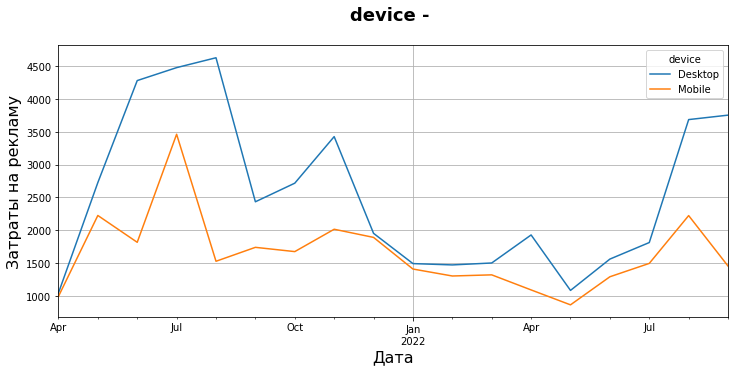

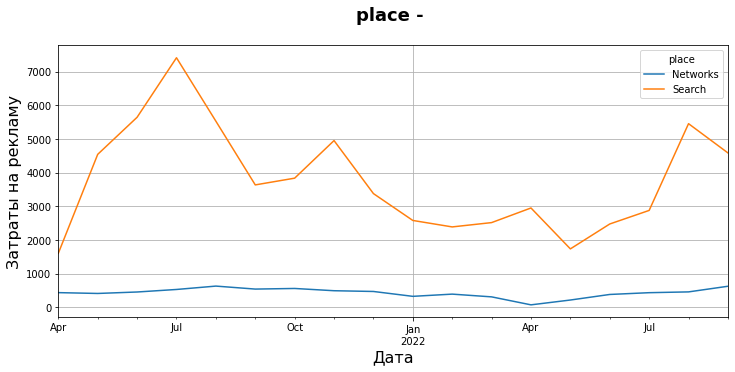

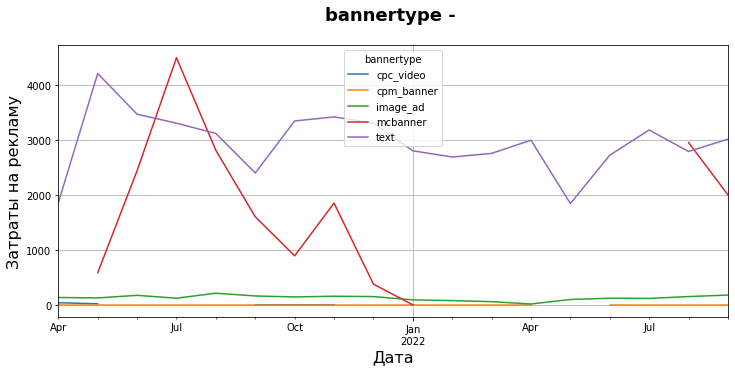

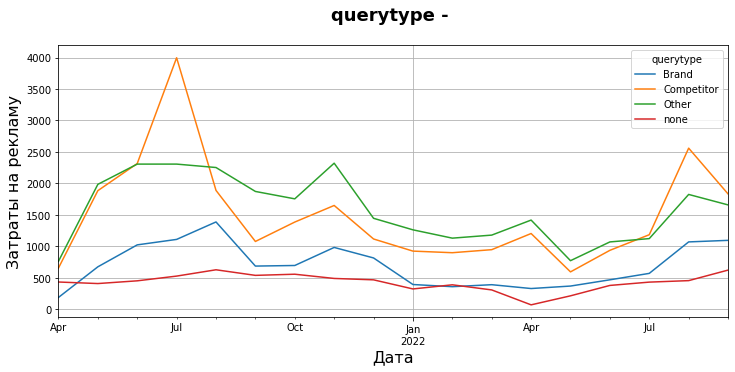

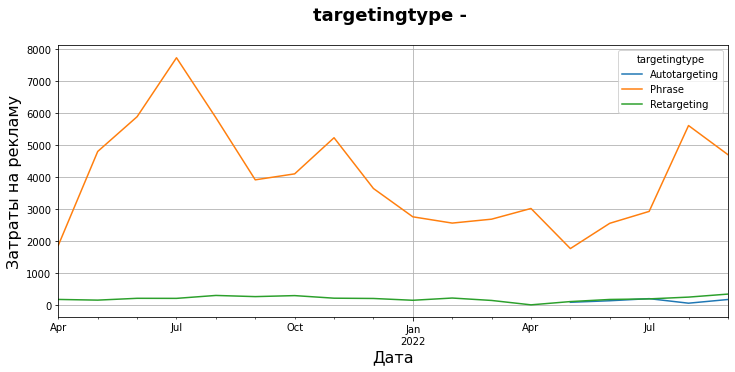

In [18]:
chart(sigma, 'cpc', 'sum')

Вывод: в целом по стоимости клика выгляди все нормально, кроме категории "Расчетно-кассовое обслуживание" и тип баннера mcbanner - не слишком высокие цены?

#### По стоимости целевых действий

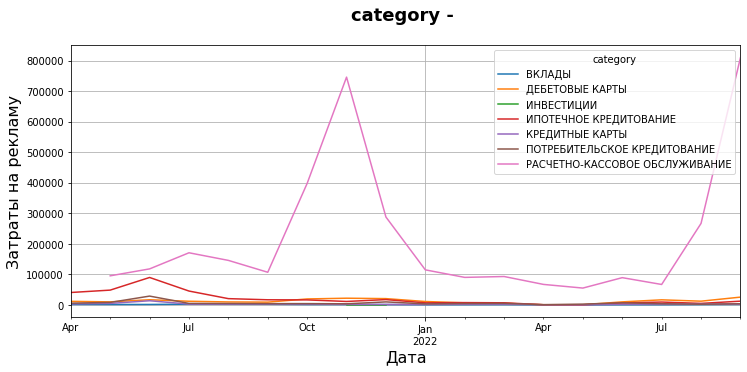

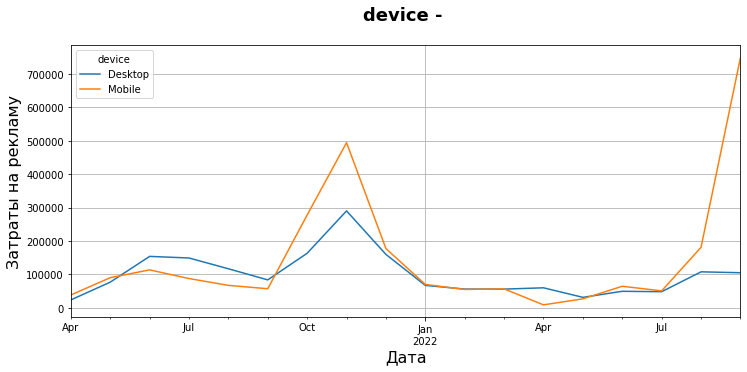

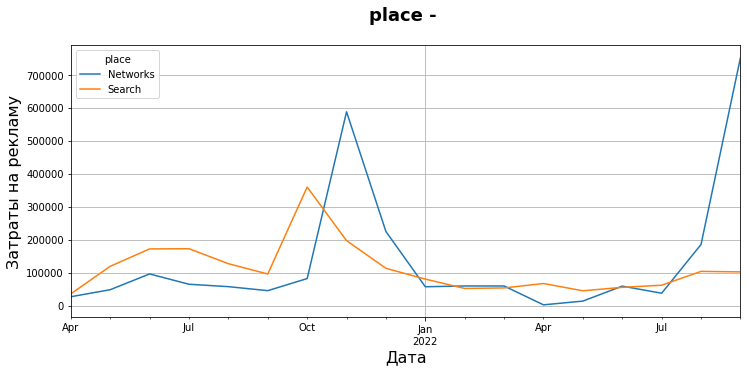

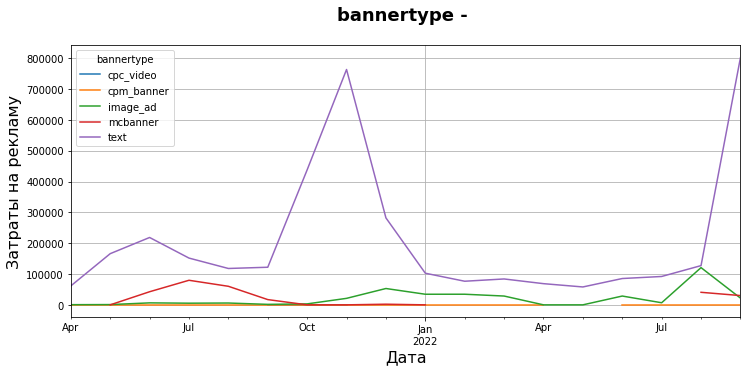

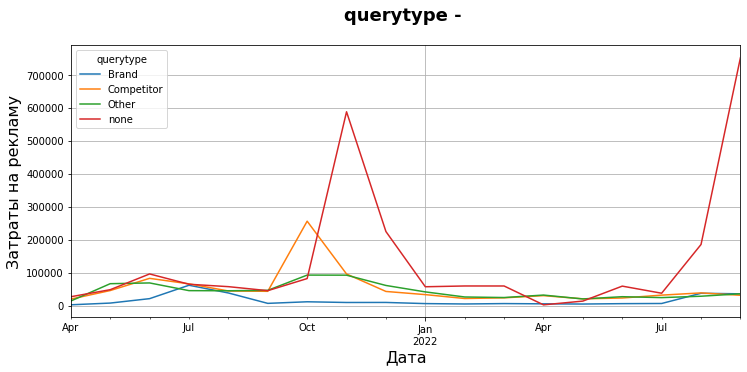

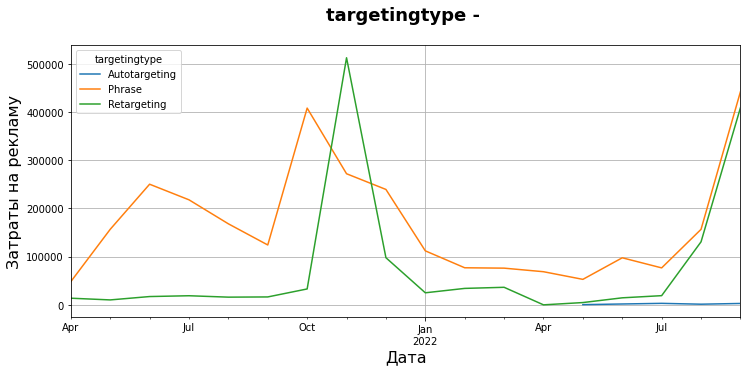

No handles with labels found to put in legend.


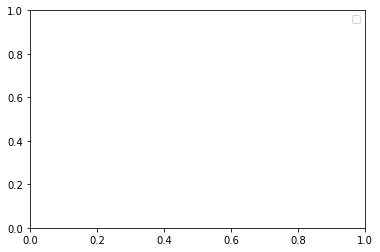

In [19]:
chart(sigma_filtered, 'cpa', 'sum')

Вывод:Здесь уже видны явные аномалии: Категория "Расчетно-кассовое обслуживание" сильно выделяется среди других. По остальным свойсвам тоже видно рост как раз июнь-сентябрь 2022. Нужно отфильтровать по категории "Расчетно-кассовое обслуживание" и  взглянуть на остальные свойства.

#### Анализ в Сигме (Расчетно-кассовое обслуживание)

In [20]:
sigma_rko = sigma_filtered.query('category == "РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ"')

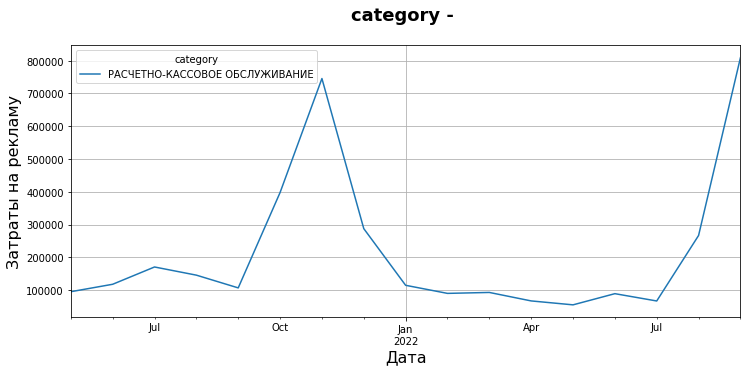

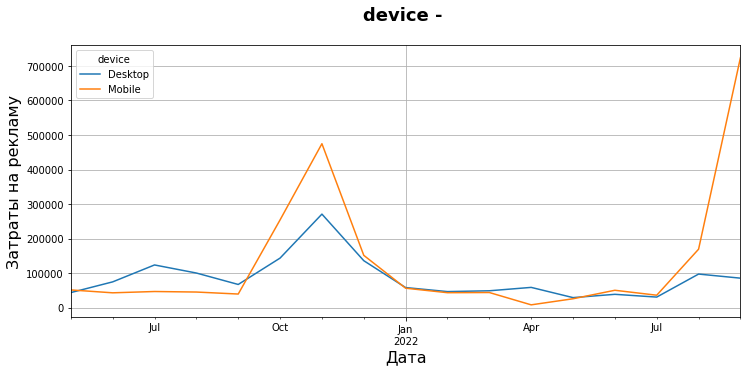

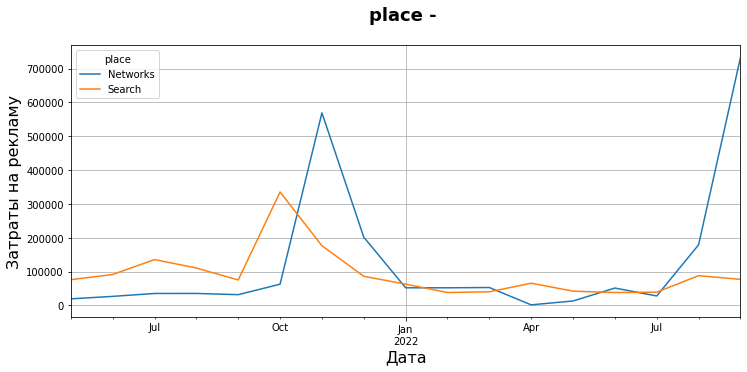

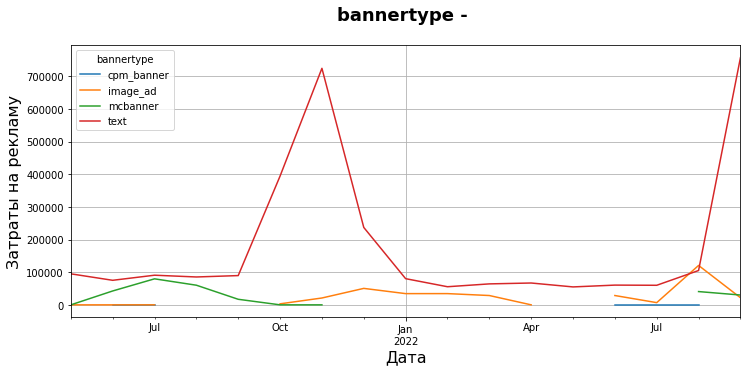

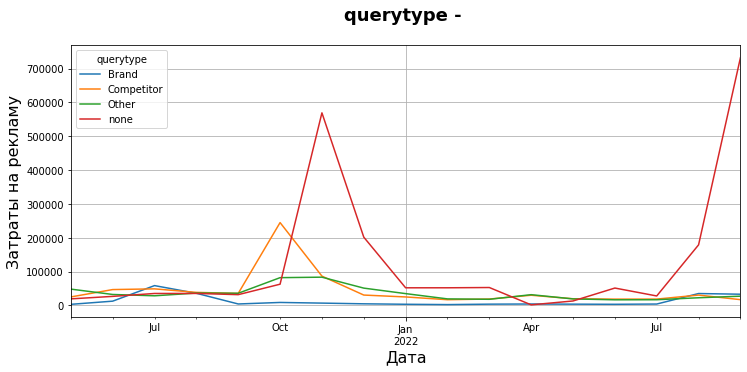

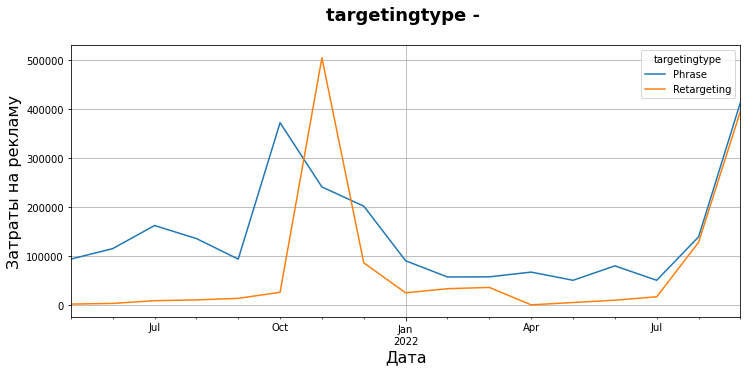

In [21]:
chart(sigma_rko, 'cpa', 'sum')

Вывод: есть всплески  CPA в период с июня по сентябрь 2022
 - на мобильных устройствах
 - место размещения сеть
 - по типу баннера: текстовые
 - в типe запроса: None
 - по таргетингу: фраза и ретаргетинг

#### Анализ по количеству кликов

Может дело в недобросовестном накликивании?

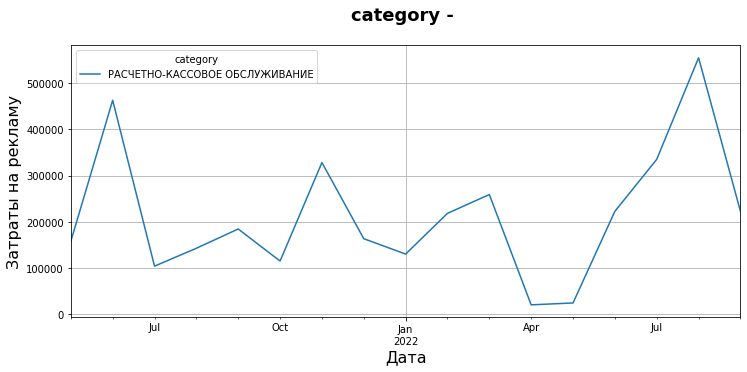

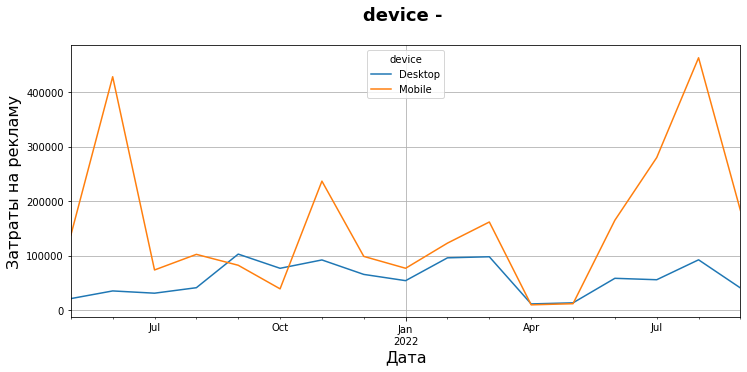

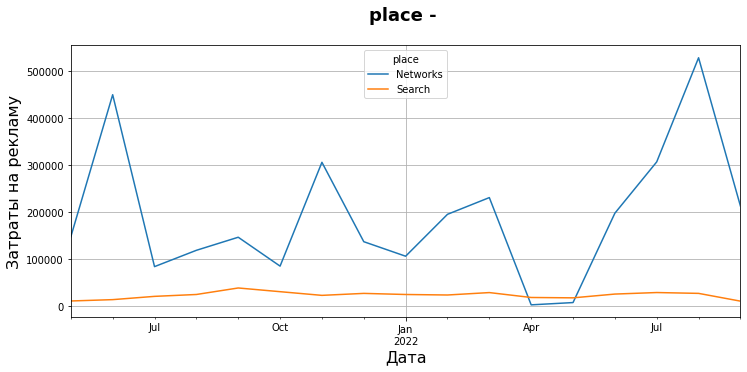

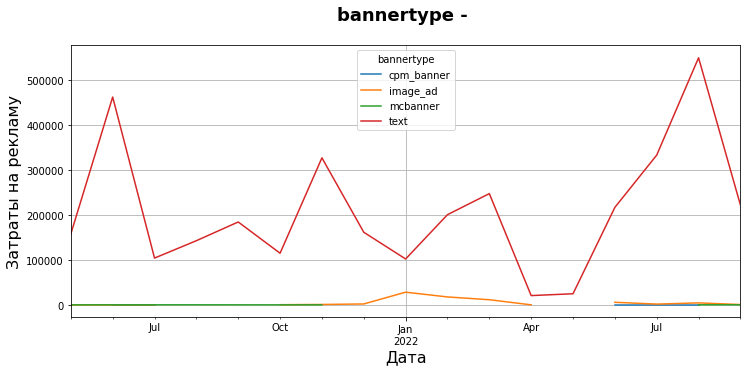

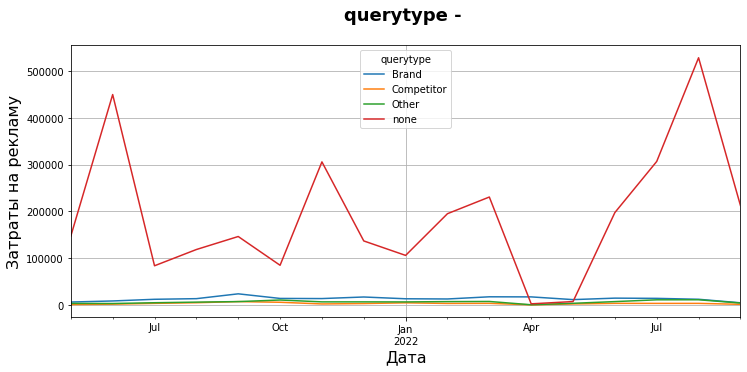

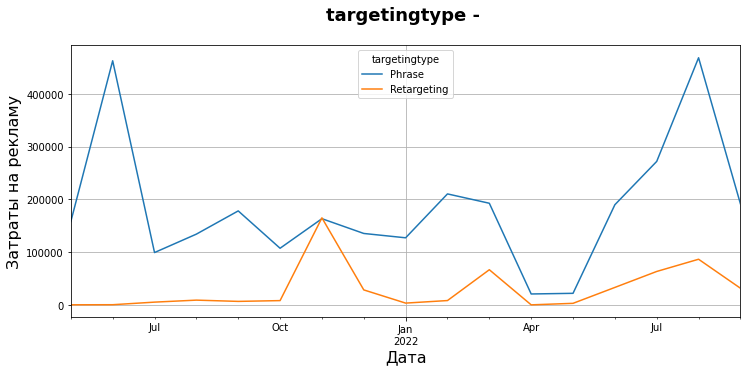

In [22]:
chart(sigma_rko, 'clicks', 'sum')

Вывод: да есть небольшой рост кликов в период июнь-сентябрь, но данная волна выглядит вполне естевственно на фоне остальных волн. Версия о недобросовестных кликах отпадает.

#### Взгляд на CR, CTR, CPA до фильтрации от строк с inf

In [23]:
def info(data):
    table = (data
             .pivot_table(
                 index = 'month',
                 values = ['shows','clicks','conversions','cost'],
                 aggfunc = 'sum')
             .reset_index()
            )
    table['cr']= table['conversions']/table['clicks']
    table['ctr'] = table['clicks']/table['shows']
    table['cpa'] = table['cost']/table['conversions']
    display(table)
    col = ['cost','shows','clicks', 'conversions','cr','ctr', 'cpa']
    for i in col:
        table.plot(x = 'month', y = i)
    return

##### Для всех категорий Сигмы

,month,clicks,conversions,cost,shows,cr,ctr,cpa
0,2021-04-01,1019188,57281,1.879835e+07,133822103,0.056203,0.007616,328.177804
1,2021-05-01,1034140,36194,1.926166e+07,129659406,0.034999,0.007976,532.178290
2,2021-06-01,1294820,22712,1.976366e+07,202927364,0.017541,0.006381,870.185769
3,2021-07-01,1084995,43744,2.281707e+07,175030521,0.040317,0.006199,521.604655
4,2021-08-01,1277760,67391,2.679524e+07,304753417,0.052742,0.004193,397.608533
5,2021-09-01,1233420,66273,2.554050e+07,455085489,0.053731,0.002710,385.383168
6,2021-10-01,1171986,59535,2.783248e+07,310918238,0.050798,0.003769,467.497798
7,2021-11-01,1225703,55714,2.229152e+07,270737935,0.045455,0.004527,400.106179
8,2021-12-01,1034446,51795,2.435009e+07,194334900,0.050070,0.005323,470.124307
9,2022-01-01,619166,39151,1.512252e+07,99344343,0.063232,0.006233,386.261436


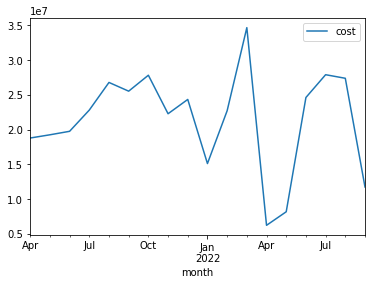

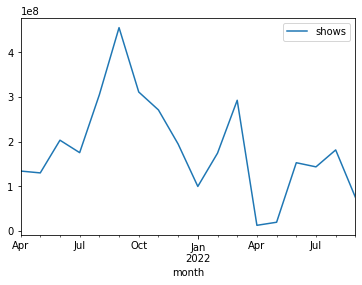

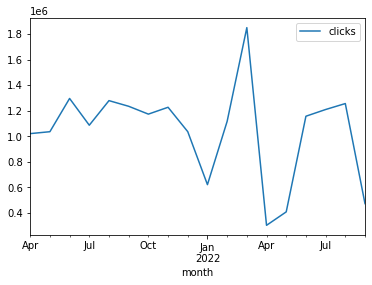

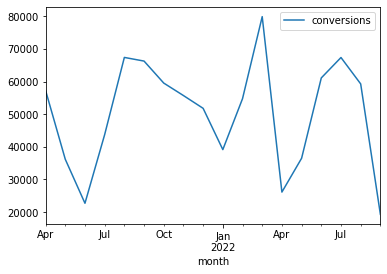

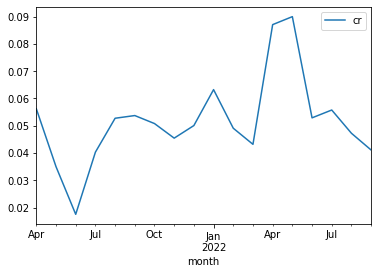

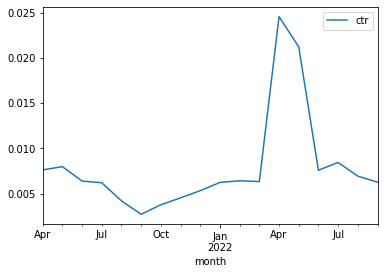

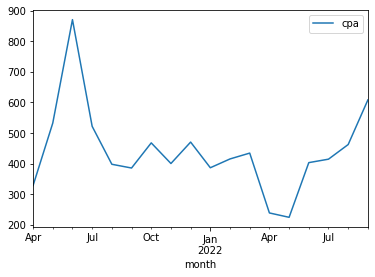

In [24]:
info(sigma)

Вывод: 
- Целевой уровень в 380 рублей по CPA достигался всего два месяца за последние полтора года - апрель и май 2022

##### Для категории "Расчетно-кассовое обслуживание"

,month,clicks,conversions,cost,shows,cr,ctr,cpa
0,2021-04-01,7003,0,4.320929e+05,5199134,0.000000,0.001347,inf
1,2021-05-01,158205,884,5.210748e+06,24869122,0.005588,0.006362,5.894512e+03
2,2021-06-01,463136,1330,7.155710e+06,85021393,0.002872,0.005447,5.380233e+03
3,2021-07-01,104381,1311,6.491048e+06,38803932,0.012560,0.002690,4.951219e+03
4,2021-08-01,143163,1555,7.318675e+06,73699546,0.010862,0.001943,4.706544e+03
5,2021-09-01,185303,1110,6.612932e+06,233221441,0.005990,0.000795,5.957596e+03
6,2021-10-01,115635,612,9.457988e+06,102401714,0.005293,0.001129,1.545423e+04
7,2021-11-01,340414,668,8.589262e+06,150898280,0.001962,0.002256,1.285818e+04
8,2021-12-01,201103,1086,8.631904e+06,105825725,0.005400,0.001900,7.948346e+03
9,2022-01-01,132781,1431,6.747258e+06,61723650,0.010777,0.002151,4.715065e+03


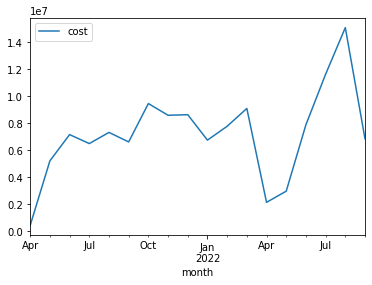

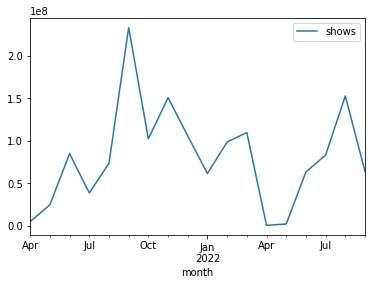

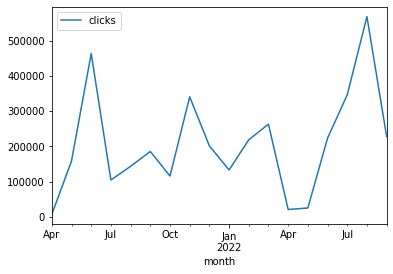

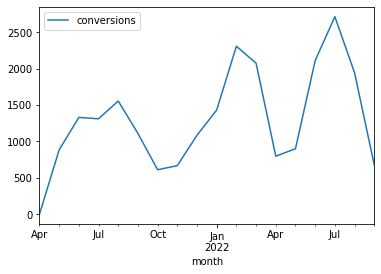

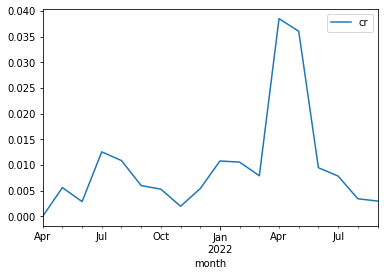

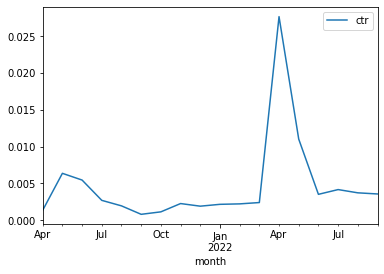

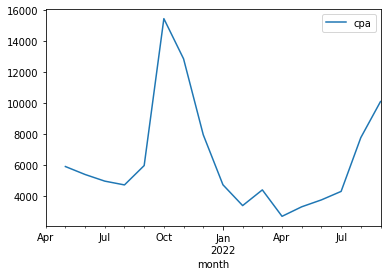

In [25]:
info(sigma.query('category == "РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ"'))

Вывод: CR(Конверсия из кликов в целевые действия) падает с апреля по сентябрь одновременно с ростом цены

## Выводы

1. У клиента Сигма аномально высокое CPA присутствует в категории "РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ", в данной категории выявлены следующие всплески  CPA в период с июня по сентябрь 2022
 - на мобильных устройствах
 - место размещения сеть
 - по типу баннера - текст
 - в типe запроса рост в None
 - по таргетингу: фраза и ретаргетинг
 
Так же в данной категории с апреля по сентябрь наблюдается падение показателя CR(конверсии из кликов в целевые действия) одновременно с ростом цены

2. Рекомендации по снижению и стабилизации CPA
 - Стоит уменьшить затраты на рекламу в категории "РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ" и направить освободившиеся средства на менее конкурентные категории
 В категории "РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ" проверить и оптимизировать рекламную кампанию
 - на мобильных устройствах
 - в текстовых типах баннеров
 - тип запроса: None
 - по таргетингу: фраза и ретаргетинг